# Lab session week 4: Analysis and cleaning

In this lab session you will learn how to work with analysing, cleaning and preprocessing data. You will use the kNN classifier in the end.

This weeks lab session consists of 6 exercises:
1. Analysing your data
2. Imputation of missing values
3. Dealing with outliers
4. Feature selection
5. Preprocessing
6. Classification with kNN

In [38]:
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.set_option('display.max_columns', 500)

## Exercise 1: analysing data with Pandas
During this exercise we will use the dataset `housedata.csv`. Please watch the following video to understand the describe function of Pandas:

In [28]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/MaTAhxRsshE" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

c:\year4hboict\IntroMachineLearning\.venv\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


This exercise will use a dataset that has been created using this dataset from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). It might be useful to look up the column information for each of the columns in your own dataset before you proceed.

Now it is time to analyse our own dataset `housedata.csv`. Please do the following exercises:
1. Load your data into a dataframe
2. Have a look at the statistics using the describe function (hint: use include = 'all') 
3. Create several different plots (histograms/violinplots/boxplots/scatterplots) to visualize the data. Show differences between features (plot single features or use colors to distinguish between features) and also between labels.
4. Use the results of (2) and (3) to answer the following questions:
    - Does your dataset have missing values?
    - Are their outliers?
    - How is the distribution of your data? Try to answer this for each feature. Describe in terms of normal, skewed (left or right) or another type of distribution (multi modal, ...).
    - Can you already see what features can give a good prediction? If so: which features and why?

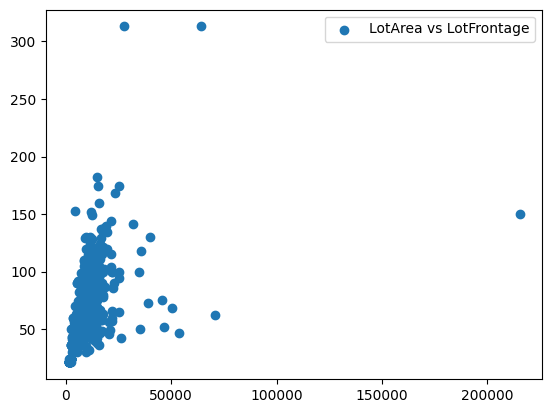

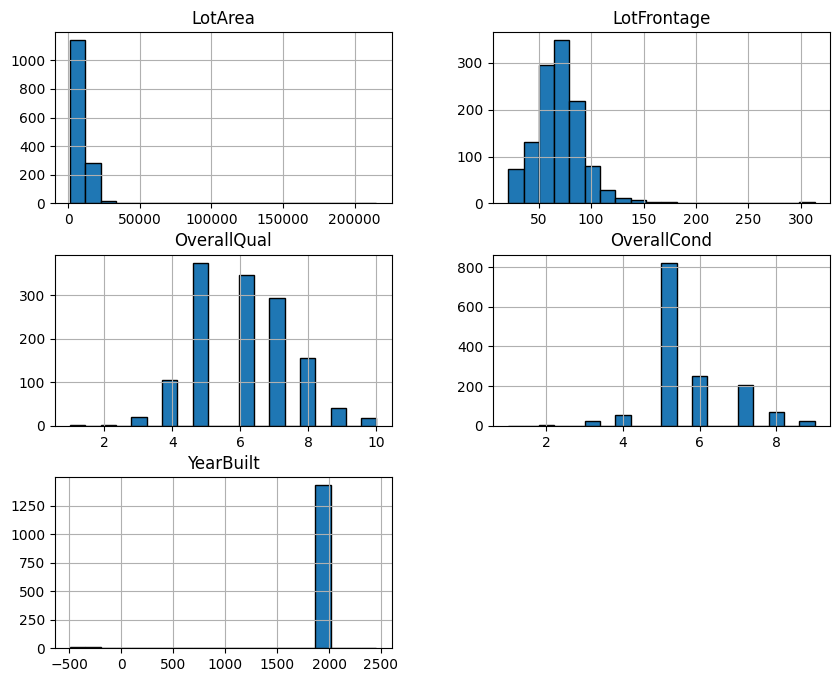

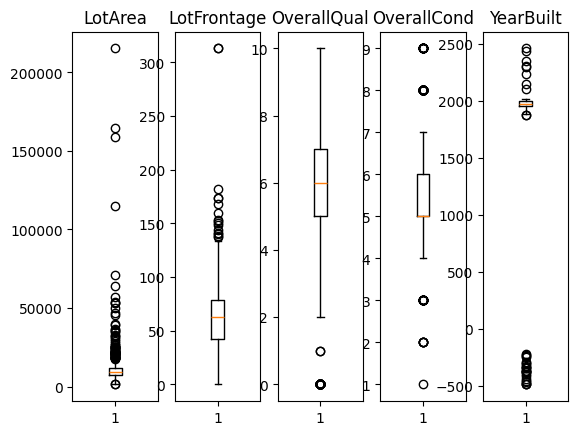

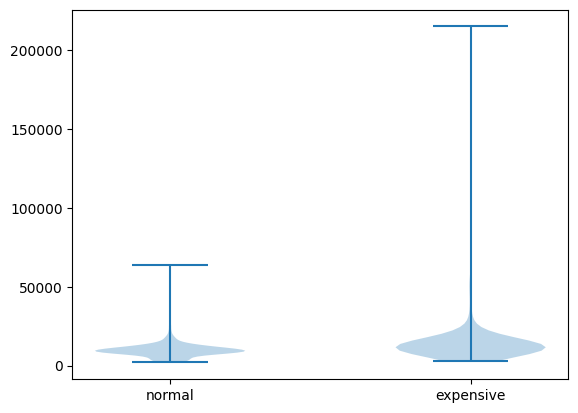

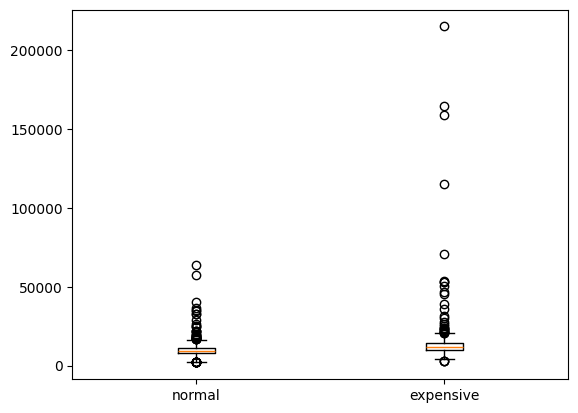

In [29]:
# Your code here
df = pd.read_csv('housedata.csv', delimiter=',')
rows = 2
cols = 3

# plt.figure(1)

# plt.subplot(rows,cols,1)
# plt.scatter(x= df['HeatingQC'], y= df['LotArea'])

# plt.subplot(rows,cols,2)
# plt.scatter(x= df['HeatingQC'], y= df['YearBuilt'])

# plt.subplot(rows,cols,2)
# plt.scatter(x= df['HeatingQC'], y= df['LotFrontage'], c='red')

# plt.subplot(rows,cols,3)
# plt.scatter(x= df['Label'], y= df['OverallQual'], c='green')
plt.scatter(x=df['LotArea'], y=df['LotFrontage'], label='LotArea vs LotFrontage')
plt.legend()
plt.show()



col_list = ['BldgType', 'HeatingQC', 'Label']
int_df = df.select_dtypes(exclude='object')
obj_df = df[['HeatingQC', 'Label']]

int_df.hist(bins=20, figsize=(10,8),edgecolor='black')
plt.show()


i = 1
for col in list(int_df.columns):
    plt.subplot(1, 5, i)
    plt.boxplot(pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int))
    plt.title(col)
    i += 1
plt.show()

plt.violinplot([df[df['Label'] == 'normal']['LotArea'], df[df['Label'] == 'expensive']['LotArea']])
plt.xticks((1, 2), ['normal', 'expensive'])
plt.show()


plt.boxplot([df[df['Label'] == 'normal']['LotArea'], df[df['Label'] == 'expensive']['LotArea']])
plt.xticks((1, 2), ['normal', 'expensive'])
plt.show()



# plt.subplot(rows, cols, 6)
# plt.violinplot(int_df)


# # plt.figure(2)
# plt.subplot(1,1,1)
# plt.hist(obj_df)



# print (list(int_df.columns))
# print(df.dtypes)
# for col in col_list:
#     plt.subplot(rows,cols, col_list.index(col)+4)
#     plt.hist(df[col])


# plt.show()
# df.describe(include='all')

**Your answers:**
- Does the data set have missing values? Which columns/features?
    - Yes, BldgType has NaN values
- Does the data set have outliers? Which columns/features?
    - yes, LotArea has a some outliers and yearbuilt has an outlier since most are around 2000 and then there is one of -400
- How is the distribution of your data? Try to answer this for each feature. Describe in terms of normal, skewed (left or right) or another type of distribution (multi modal, ...).
    - LotArea: skewedLeft
    - LotFrontage: skewed left
    - OverallQuall: normal
    - OverallCond: normal
    - yearBuilt: normal
- Can you already see what features can give a good prediction? If so: which features and why?
    - OverallQaull, since according to the boxplot it has the least amount of outliers 

## Exercise 2: Imputation
We will now fix the problem of missing values by using imputation. Please watch the following video to understand how imputation works:

In [30]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/D6saJ9R65L4" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

c:\year4hboict\IntroMachineLearning\.venv\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Lets try to do imputation on our own dataset.

1. Impute missing values (mean, median or mode) depending on the earlier found statistics
2. Use the Scikit-learn framework for imputation (http://scikit-learn.org/stable/modules/impute.html)

In [31]:
# Impute missing values for numerical data using the imputer

# Your code here

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

print('pre-imputing:')
print(df.isnull().sum())

#frontage
# frontage_mean = imp_mean.fit_transform(df[['LotFrontage']])
# frontage_mode = imp_mode.fit_transform(df[['LotFrontage']])
# frontage_median = imp_median.fit_transform(df[['LotFrontage']])

df['LotFrontage'] = imp_mean.fit_transform(df[['LotFrontage']])
df['OverallQual'] = imp_mode.fit_transform(df[['OverallQual']])




pre-imputing:
LotArea          0
LotFrontage    259
BldgType        82
OverallQual     98
OverallCond      0
YearBuilt        0
HeatingQC        0
Label            0
dtype: int64


In [32]:
# Impute missing values for categorical values using pandas operations

# Your code here
df['BldgType'] = df['BldgType'].fillna(df['BldgType'].mode()[0])
df.isnull().sum()

LotArea        0
LotFrontage    0
BldgType       0
OverallQual    0
OverallCond    0
YearBuilt      0
HeatingQC      0
Label          0
dtype: int64

## Exercise 3: Dealing with outliers
Since your dataset contains some outliers, we should fix this problem before proceeding to the next step. Read the following two (short) articles:
1. https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
2. https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Use the described techniques, find the outliers in your dataset and deal with them!

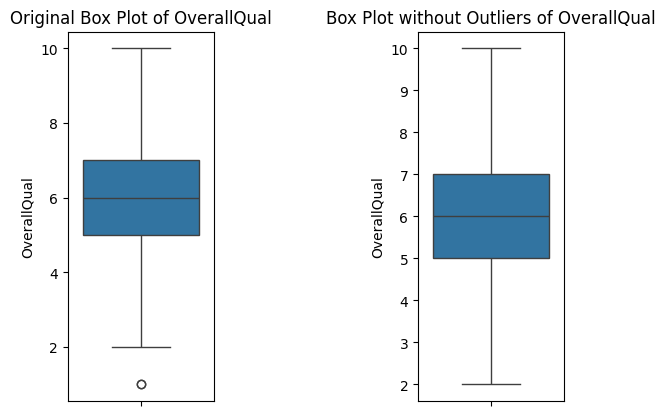

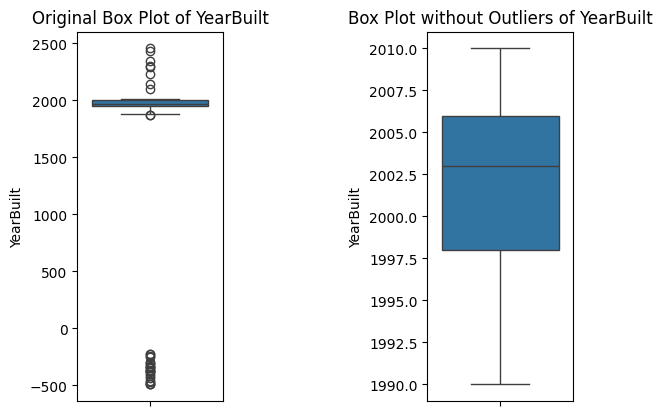

In [33]:
# Your code here
import seaborn as sns
def outlier_removal_box_plot(column, dataframe, threshold):
    plt.subplot(1,3,1)
    sns.boxplot(dataframe[column])
    plt.title(f'Original Box Plot of {column}')
    # plt.show()

    removed_outliers = dataframe[dataframe[column] >= threshold]

    plt.subplot(1,3,3)
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

def min_max_outlier_removal_box_plot(column, dataframe, min_threshold, max_threshold):
    plt.subplot(1,3,1)
    sns.boxplot(dataframe[column])
    plt.title(f'Original Box Plot of {column}')
    # plt.show()

    removed_outliers = dataframe[((dataframe[column] >= min_threshold) & (dataframe[column] <= max_threshold))]

    plt.subplot(1,3,3)
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

thresh = 2
min_year = 1990
max_year = 2024

removed_quall_outliers = outlier_removal_box_plot('OverallQual', df, thresh)
removed_year_outliers = min_max_outlier_removal_box_plot('YearBuilt', df, min_year, max_year)

df[['OverallQual']] = removed_quall_outliers[['OverallQual']]
df[['YearBuilt']] = removed_year_outliers[['YearBuilt']]
# df.head()

## Exercise 4: Feature selection
In the feature selection phase you try to find out if all features are needed for your model (e.g. are they relevant?) In the lecture is explained how you can do that. By hand (using correlation matrices) or by using tools from ScikitLearn. For this situation there are not many features. Find out by hand (using a correlation matrix) if there are features highly positive or highly negative related. If so: what does this tell us? And if not: what does this mean? Which features do you want to keep for training/testing?

In [34]:
# Your code here
# df.describe()
int_df = df.select_dtypes(exclude='object')
print(int_df.corr())
# print(df.corr())

              LotArea  LotFrontage  OverallQual  OverallCond  YearBuilt
LotArea      1.000000     0.306795     0.102304    -0.005636  -0.069030
LotFrontage  0.306795     1.000000     0.219347    -0.052820   0.051731
OverallQual  0.102304     0.219347     1.000000    -0.105146   0.229267
OverallCond -0.005636    -0.052820    -0.105146     1.000000  -0.222520
YearBuilt   -0.069030     0.051731     0.229267    -0.222520   1.000000


following the output of  the previous cell:
| table       | LotArea      | LotFrontage  | OverallQual  | OverallCond  | YearBuilt |
| ----------- | ------------ | ------------ | ------------ | ------------ | --------- |
| LotArea     |  1.000000    |  0.306795    |  0.102304    | -0.005636    | -0.069030 |
| LotFrontage |  0.306795    |  1.000000    |  0.219347    | -0.052820    |  0.051731 |
| OverallQual |  0.102304    |  0.219347    |  1.000000    | -0.105146    |  0.229267 |
| OverallCond | -0.005636    | -0.052820    | -0.105146    |  1.000000    | -0.222520 |
| YearBuilt   | -0.069030    |  0.051731    |  0.229267    | -0.222520    |  1.000000 |

it is there are no strong correlations between the variables

## Exercise 5: Preprocessing
In order to use the data we have to preprocess the data. We have to perform several steps to make the data ready for classification.

1. Apply one-hot-encoding on categorical features (use Scikit-learn or getDummies in Pandas (see: http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example))
2. Apply min-max-scaling or standardization (use Scikit-learn)

In [35]:
#1: Apply one hot encoding (using getdummies and concat?)

# Your code here
categorical_columns = ['BldgType', 'HeatingQC', 'Label']
one_hot_encoded_data = pd.get_dummies(df, columns=categorical_columns)

# Convert encoded columns to integer type
for col in one_hot_encoded_data.columns:
    if col.startswith(tuple(categorical_columns)):
        one_hot_encoded_data[col] = one_hot_encoded_data[col].astype(int)

df = one_hot_encoded_data
print(one_hot_encoded_data)


      LotArea  LotFrontage  OverallQual  OverallCond  YearBuilt  \
0        8450         65.0          7.0            5     2003.0   
1        9600         80.0          6.0            8        NaN   
2       11250         68.0          7.0            5     2001.0   
3        9550         60.0          7.0            5        NaN   
4       14260         84.0          8.0            5     2000.0   
...       ...          ...          ...          ...        ...   
1455     7917         62.0          6.0            5     1999.0   
1456    13175         85.0          6.0            6        NaN   
1457     9042         66.0          7.0            9        NaN   
1458     9717         68.0          5.0            6        NaN   
1459     9937         75.0          5.0            6        NaN   

      BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0                 1                0                0               0   
1                 1                0             

In [36]:
#2: Apply min-max scaling or standardization

# Your code here
columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())


    LotArea  LotFrontage  OverallQual  OverallCond  YearBuilt  BldgType_1Fam  \
0  0.033420     0.150685        0.625        0.500       0.65            1.0   
1  0.038795     0.202055        0.500        0.875        NaN            1.0   
2  0.046507     0.160959        0.625        0.500       0.55            1.0   
3  0.038561     0.133562        0.625        0.500        NaN            1.0   
4  0.060576     0.215753        0.750        0.500       0.50            1.0   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0              0.0              0.0             0.0              0.0   
1              0.0              0.0             0.0              0.0   
2              0.0              0.0             0.0              0.0   
3              0.0              0.0             0.0              0.0   
4              0.0              0.0             0.0              0.0   

   HeatingQC_Ex  HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA  \
0          

## Exercise 6: Classification
1. Split the dataset in two parts (75%/25%) for training and testing.
2. Use the kNN algorithm from Scikit-learn and train a classifier
3. Validate using your testset
4. Play around with several hyperparameters to optimize your classification results

**Warning: this dataset will probably not give you great classification results (around 70% score)**

In [49]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


df['OverallQual'] = imp_mode.fit_transform(df[['OverallQual']])
df['YearBuilt'] = imp_mode.fit_transform(df[['YearBuilt']])

# print(df.dtypes)

X = df.drop([col for col in df.columns if col.startswith('Label_')], axis=1)
Y = df[[col for col in df.columns if col.startswith('Label_')]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=45)


# print(df.isnull().sum())

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7095890410958904
